In [61]:
import pandas as pd
import pickle
from collections import Counter
import math
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

In [2]:
data = pd.read_csv("dados/resultado.csv", header = None) 

* Data da mensagem
* Usuário que postou a mensagem
* Texto da mensagem
* Pontuação para  classe=paródia
* Pontuação para  classe=opinião
* Pontuação para  classe=campanha
* Pontuação para  classe=experiência pessoal
* Pontuação para  classe=informação
* Resultado (qual a classe foi escolhida pela maior pontuação)
* Informação (JSON) sobre a localização

In [7]:
data.columns = ["date", "user", "message", "0", "1", "2", "3", "4", "class", "location"]

In [8]:
data.head()

,date,user,message,0,1,2,3,4,class,location
0,19/11/2010 20:04:44,PauloAfBahia,A dengue mata mas com simples gestos de preven...,0.138010,0.101521,0.254248,0.085880,0.420341,3,"{u'd': 1443198862750, u'v': 1}"
1,19/11/2010 20:05:05,PortalOuroNegro,Mutirão contra a Dengue começou nesta sexta em...,0.105452,0.056434,0.248333,0.188912,0.400869,3,"{u'city': u'Linhares', u'country': u'Brasil', ..."
2,19/11/2010 20:05:30,Kustelaas,@depChicoAlencar amannhã alem do dia da consiê...,0.054194,0.084122,0.213530,0.146927,0.501226,3,"{u'country': u'Brasil', u'state': u'MT', u'typ..."
3,19/11/2010 20:05:58,Raul_Jungmann,Pernambuco tem risco de sofrer epidemia de den...,0.080289,0.106928,0.054929,0.141276,0.616577,3,"{u'city': u'Recife', u'country': u'Brasil', u'..."
4,19/11/2010 20:06:18,laana_mello,Rpz...acho q a Caueira tah com surto de dengue...,0.112013,0.143425,0.094947,0.429626,0.219990,0,"{u'country': u'Brasil', u'state': u'MT', u'typ..."


In [5]:
data.shape

(7503165, 10)

shrink database

In [18]:
data = data[:1000]

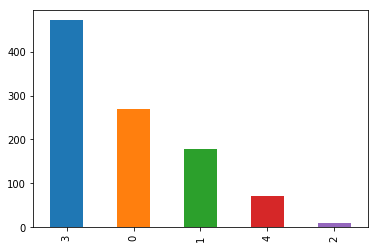

In [19]:
data['class'].value_counts().plot('bar')

In [20]:
text = pd.Series(data['message'].tolist()).astype(str)

https://www.kdnuggets.com/2018/08/wtf-tf-idf.html

In [76]:
idf_counter = Counter()

In [77]:
for text in data['message']:
    words = text.lower().split()
    idf_counter.update(words)

In [78]:
idf = {
  word: math.log(len(data)/df, 2)
  for word, df in idf_counter.items()
}

In [91]:
sorted(idf, key=idf.get)[100:120]

['mobilização',
 'ele',
 'pelo',
 'vai',
 'vc',
 'muito',
 'será',
 'mosquit...',
 'risco',
 'novo',
 'te',
 '?',
 'nem',
 '@g1:',
 'vem',
 'pneus',
 'dengue...',
 'casa',
 '#tweetfor',
 'porque']

In [93]:
sorted(idf, key=idf.get)[-4:]

['lado', 'mercadorama.', 'água,', 'qqqq']